# Visualizing Real World data can be tough

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# df = nx.to_pandas_edgelist(G)
# df.to_csv('facebook.csv', index=False, )

## Read Facebook's graph database

In [2]:
import pandas as pd
df = pd.read_csv('facebook.csv')

# Facebook is written as an adjacency list

The actual facebook dataset is written as an adjacency list. I've just downloaded it as a csv file for visualization of what it represents. However, I converted it into an edge list for easier visualization.

In [18]:
# Edge list
df.head()

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


## Adjacency list

In [52]:

f = {'target':list}
df.loc[(df.source == 10) | (df.source == 100), :].groupby('source', as_index=False).agg(f)

,source,target
0,10,"[67, 142, 169, 200, 277, 285, 291, 323, 332]"
1,100,"[119, 150, 163, 189, 217, 269, 323]"


## Adjacency matrix

In [55]:
pd.crosstab(df.loc[(df.source == 10) | (df.source == 100), 'source'], df.loc[(df.source == 10) | (df.source == 100), 'target'])

target,67,119,142,150,163,169,189,200,217,269,277,285,291,323,332
source,,,,,,,,,,,,,,,
10,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1
100,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0


## Reading from adjacency list

In [5]:
G = nx.read_adjlist('facebook_social_graph.adjlist')

In [6]:
# G = nx.from_pandas_edgelist(df)

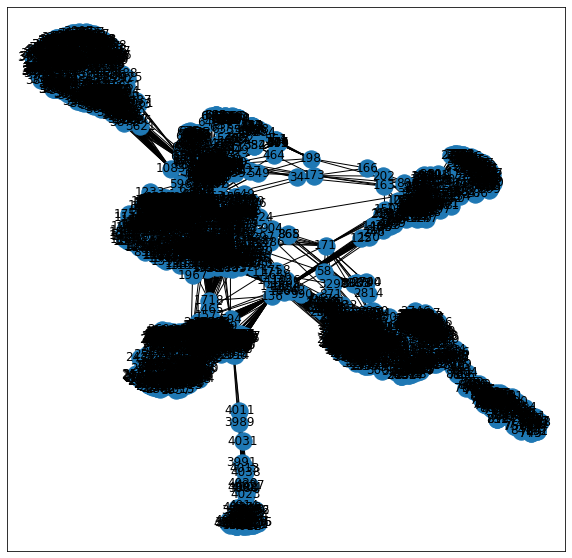

In [7]:
nx.draw_networkx(G)

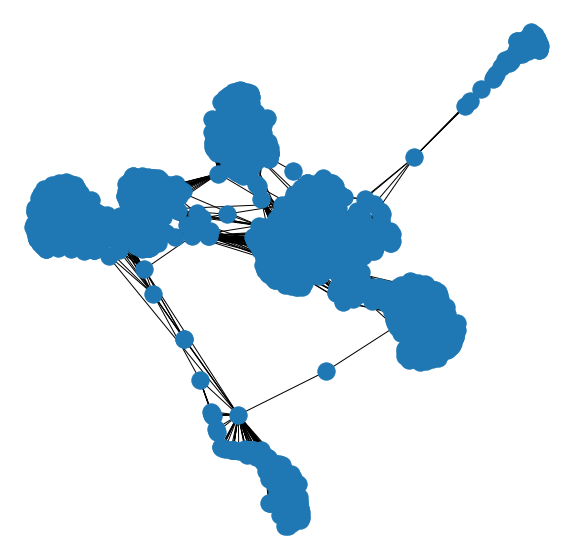

In [8]:
plt.axis('off')
nx.draw_networkx(G, with_labels=False)

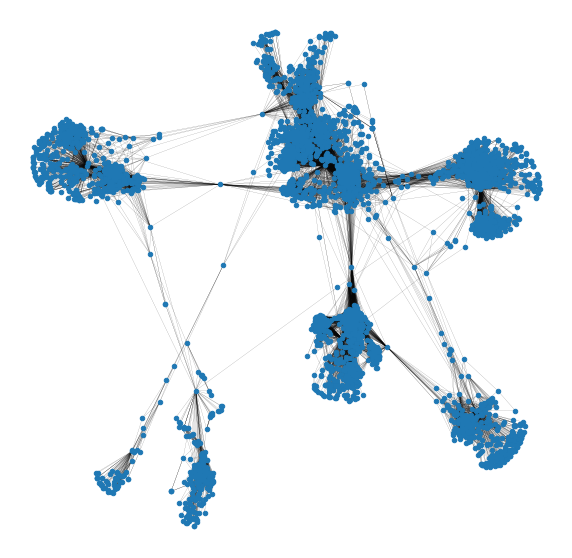

In [9]:
plt.axis('off')
nx.draw_networkx(G, with_labels=False, node_size=20, width=0.1)

In [10]:
pos = nx.spring_layout(G)

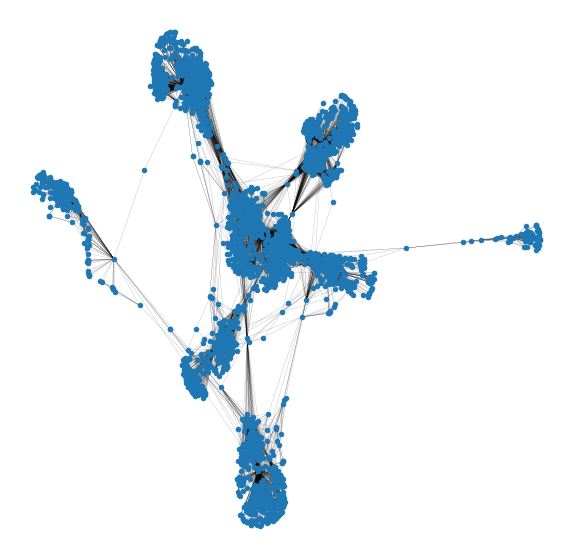

In [11]:
plt.axis('off')
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=20, width=0.1)

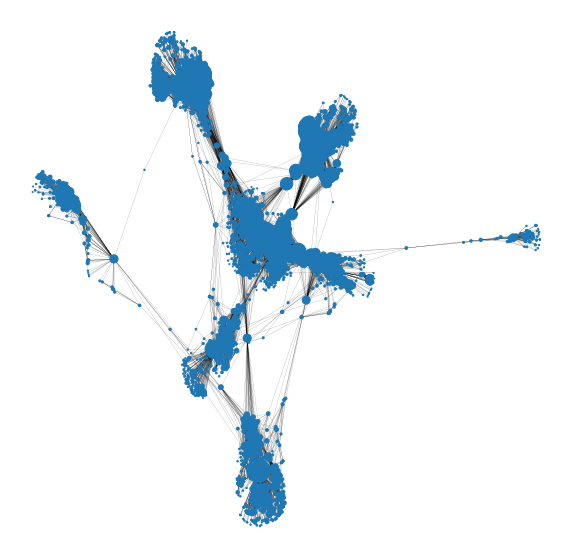

In [12]:
plt.axis('off')
node_sizes = list(map(lambda node: node[1], list(G.degree)))
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=node_sizes, width=0.1)

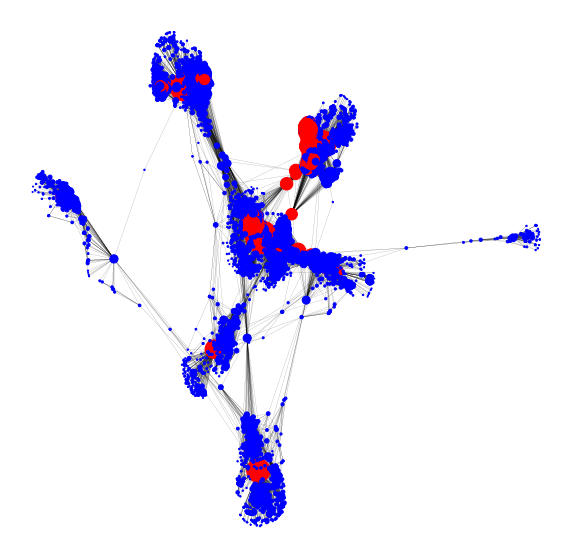

In [13]:
plt.axis('off')
node_sizes = list(map(lambda node: node[1], list(G.degree)))
node_colors = list(map(lambda degree: 'b' if degree < 100 else 'r', node_sizes))
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=node_sizes, node_color=node_colors, width=0.1)

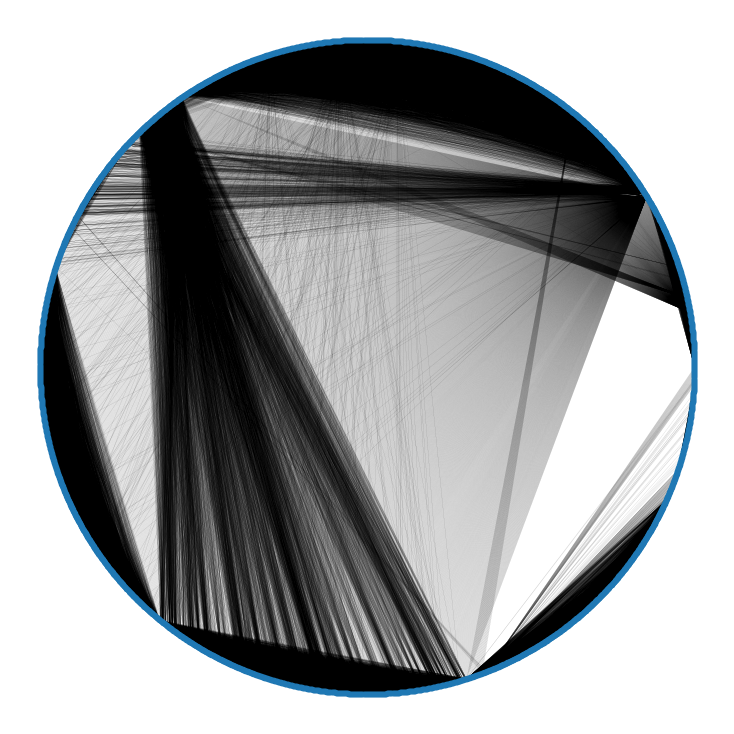

In [14]:
nx.draw_shell(G, node_size=20, width=0.05)

## Bokeh

In [ ]:
!pip install bokeh

In [15]:
import networkx as nx
from bokeh.io import show, output_notebook
from bokeh.models import Plot, Range1d, MultiLine, Circle
from bokeh.models.graphs import from_networkx

In [19]:
G = nx.read_adjlist('facebook_social_graph.adjlist')

plot = Plot(plot_width=700, plot_height=500,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

plot.title.text = "Facebook Network"

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=5)

graph_renderer.edge_renderer.glyph = MultiLine(
    line_alpha=0.4, 
    line_width=0.4
)

plot.renderers.append(graph_renderer)

In [20]:
output_notebook()
show(plot)

Loading BokehJS ...